In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("data/HR_salary.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [5]:
retain = df[df.left == 0]
retain.shape

(11428, 10)

In [6]:
df.shape

(14999, 10)

In [7]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


Text(0.5, 1.0, 'Salary vs Left')

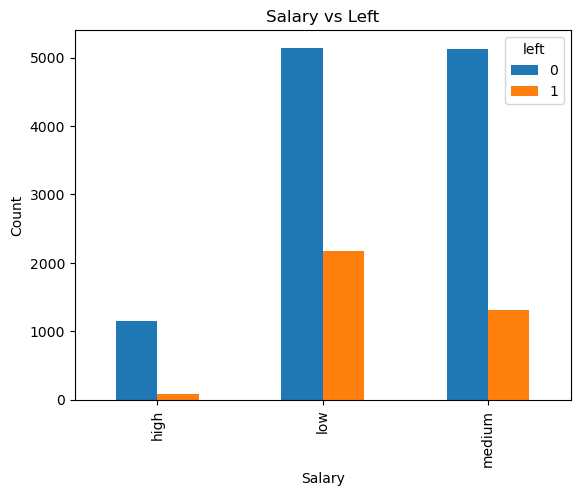

In [8]:
pd.crosstab(df.salary, df.left).plot(kind="bar")
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Salary vs Left')

Text(0.5, 1.0, 'Departmen vs Left')

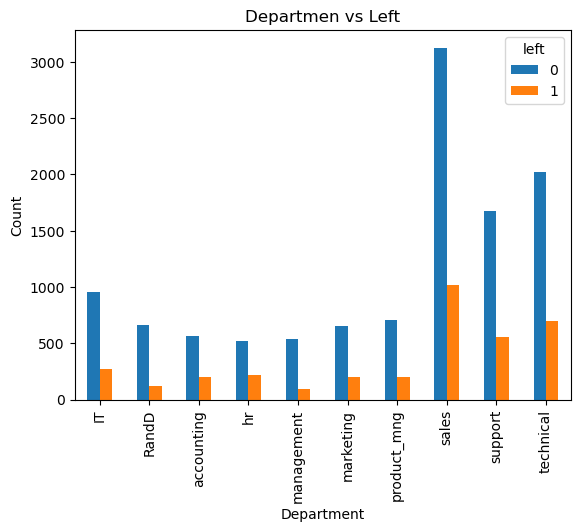

In [9]:
pd.crosstab(df.Department, df.left).plot(kind="bar")
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Departmen vs Left')

In [10]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [11]:
# If our target salary
#subdf.loc[:, "salary"] = subdf.salary.astype("category").cat.set_categories(["low", "medium", "high"], ordered=True)
#subdf.salary = subdf.salary.cat.set_categories(['low', 'medium', 'high'], ordered=True)
#y = subdf.salary.cat.codes.values

In [12]:
dummies = pd.get_dummies(subdf.salary, prefix="salary")
dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [13]:
dummies.drop("salary_medium", axis=1, inplace=True)

In [14]:
X = pd.concat([subdf, dummies], axis=1).drop("salary", axis=1)
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
0,0.38,157,0,False,True
1,0.80,262,0,False,False
2,0.11,272,0,False,False
3,0.72,223,0,False,True
4,0.37,159,0,False,True
...,...,...,...,...,...
14994,0.40,151,0,False,True
14995,0.37,160,0,False,True
14996,0.37,143,0,False,True
14997,0.11,280,0,False,True


In [15]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [17]:
model = LogisticRegression(max_iter=1000, penalty=None)

In [18]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty=None)

In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
np.array(y_test)

array([0, 0, 0, ..., 1, 0, 1])

In [22]:
accuracy_score(y_test, y_pred)

0.7677142857142857

In [23]:
model.score(X_test, y_test)

0.7677142857142857

In [24]:
model_intercept = pd.DataFrame({"Varaibles": "Intercept", "Coefficients": model.intercept_}, index=[0])
model_coefficients = pd.DataFrame({"Varaibles": X_train.columns, "Coefficients": model.coef_[0]})
model_coefficients = pd.concat([model_intercept, model_coefficients]).reset_index(drop=True)
model_coefficients

,Varaibles,Coefficients
0,Intercept,0.572182
1,satisfaction_level,-4.052560
2,average_montly_hours,0.001918
3,promotion_last_5years,-1.493437
4,salary_high,-1.570005
5,salary_low,0.446982


In [25]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[7410,  584],
       [1855,  651]])

In [26]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale=1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     fmt=".0f",
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

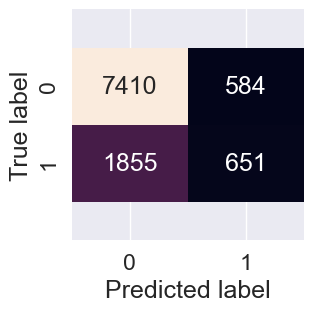

In [27]:
plot_conf_mat(y_test, y_pred)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7677142857142857
Precision: 0.5271255060728745
Recall: 0.25977653631284914


In [29]:
X_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low
6723,0.65,226,0,False,False
6473,0.88,166,0,False,True
4679,0.69,214,0,False,True
862,0.41,154,0,False,True
7286,0.87,254,0,False,True
...,...,...,...,...,...
7997,0.61,153,0,False,False
4276,0.70,184,0,False,False
14622,0.84,262,0,False,False
12802,0.98,257,0,False,False


In [30]:
model.predict_proba(X_test)

array([[0.83595801, 0.16404199],
       [0.90279364, 0.09720636],
       [0.79682952, 0.20317048],
       ...,
       [0.91128163, 0.08871837],
       [0.94815869, 0.05184131],
       [0.68450029, 0.31549971]])

In [31]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.16404199, 0.09720636, 0.20317048, ..., 0.08871837, 0.05184131,
       0.31549971])

In [32]:
treshold = 0.2
y_pred = (y_pred_proba > treshold).astype("float")
y_pred

array([0., 0., 1., ..., 0., 0., 1.])

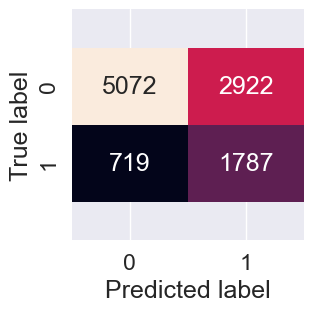

In [33]:
plot_conf_mat(y_test, y_pred)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.6532380952380953
Precision: 0.37948609046506687
Recall: 0.7130885873902634
